# Reinforcement Learning - Minimal Q-learning bot

### Some terms:
- Agent: An entity containing possible actions and policy functions, acts in the environment (example: A robot vacuum)
- Environment: the bounded (or unbounded) are where the agent operates (example: An apartment)
- State : Interpreted information about the environment (example: An image of the apartment in the direction the robot vacuum is facing)
- Reward : Imediate value of performing some action (example: Action: You work overtime to fix a bug, reward: Pat on the back and a "Good job!")
- Policy : A mapping between a state and an action (example: floor: dirty -> action: clean)
- Episode: A bounded number of time steps in the environment

<img src="img/2560px-Reinforcement_learning_diagram.png" alt="drawing" width="500"/>

## GridWorld:

<img src="img/gridworld.png" alt="drawing" width="500"/>

In [1]:
from qlearning import QLearner
from grid_world import GridWorld
import pandas as pd

In [2]:
def newBoard(): 
    board = [   
        0,0,0,0,0,
        0,1,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0,
        0,0,0,0,0]

    rewards = dict()
    rewards[24] = 100
    rewards[4] = -50
    rewards[19] = -20

    grid_world = GridWorld(board, rewards, 6, 24, 5, 5)
    return grid_world

In [4]:
def qlearner(learning_rate=0.1, discount_factor=0.9, explore_rate = 0.01):
    learner = QLearner(['up', 'down', 'right', 'left'], learning_rate, discount_factor, explore_rate)
    episodes = list()
    for episode in range(1, 200):
        totalValue = 0
        actions = list()
        world = newBoard()
        learner.start_episode(world.actor_pos)

        end = False
        while end != True:
            action = learner.act(world.actor_pos)
            actions.append(action)
            value, end = world.act(action)
            totalValue += value
            learner.reward(value, world.actor_pos)

        learner.end_episode()
        episodes.append((episode, totalValue, actions))
    return learner, episodes

In [5]:
def episodes_to_df(episodes, columns=['episode', 'total value', 'actions']) -> pd.DataFrame:
    return pd.DataFrame(episodes, columns=columns)

def print_actions(episodes):
    for episode, totalValue, actions in episodes:
        print("Episode: {}, total value: {}, actions: {}".format(episode, totalValue, actions))

In [8]:
q1, q1_episodes = qlearner()
q1_df = episodes_to_df(q1_episodes)

q2, q2_episodes = qlearner(learning_rate=0.5, explore_rate=0.1)
q2_df = episodes_to_df(q2_episodes)

q3, q3_episodes = qlearner(learning_rate=1, discount_factor=0)
q3_df = episodes_to_df(q3_episodes)

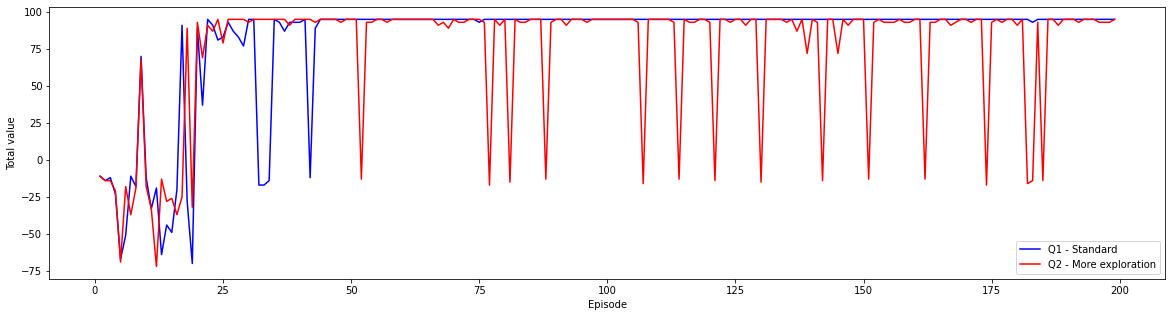

In [16]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,5))
pyplot.plot(range(1,200), q1_df['total value'], 'b-')
pyplot.plot(range(1, 200), q2_df['total value'], 'r-')
pyplot.ylabel("Total value")
pyplot.xlabel("Episode")
pyplot.legend(['Q1 - Standard','Q2 - More exploration'])
pyplot.show()

In [44]:
import collections
od = collections.OrderedDict(sorted(q1.Q.items()))
actions = [value for _, value in od.items()]
q_value_df = pd.DataFrame(actions, columns=['Up', 'Down', 'Right', 'Left'])
q_value_df



,Up,Down,Right,Left
0,-1.990000,-1.072606,-1.119862,-1.990000
1,-1.990000,-1.124482,-1.167315,-1.175393
2,-1.000000,-0.974727,-0.952368,-0.955599
3,-1.000000,-0.779313,-5.000000,-0.762102
4,-1.000000,-0.100000,0.000000,0.000000
5,-1.185969,-1.133412,-1.141210,-1.990000
6,-1.427588,-1.421731,54.939656,-1.429892
7,-0.925578,62.166977,-0.909096,3.980370
8,-0.676580,0.849824,-0.631634,-0.656714
9,-5.000000,-0.477041,-1.000000,-0.529115


In [43]:

print_actions(q1_episodes)

Episode: 1, total value: -11, actions: ['up', 'up']
Episode: 2, total value: -14, actions: ['down', 'up', 'right', 'up', 'up']
Episode: 3, total value: -12, actions: ['left', 'up', 'up']
Episode: 4, total value: -23, actions: ['up', 'down', 'down', 'down', 'up', 'right', 'up', 'down', 'down', 'up', 'right', 'up', 'up', 'up']
Episode: 5, total value: -67, actions: ['right', 'right', 'down', 'down', 'up', 'right', 'up', 'up', 'up']
Episode: 6, total value: -51, actions: ['left', 'down', 'up', 'right', 'up', 'right', 'down', 'left', 'down', 'left', 'down', 'up', 'right', 'up', 'right', 'up', 'right', 'down', 'right', 'down', 'down', 'up', 'right']
Episode: 7, total value: -11, actions: ['left', 'left']
Episode: 8, total value: -18, actions: ['up', 'left', 'down', 'up', 'right', 'right', 'left', 'left', 'left']
Episode: 9, total value: 70, actions: ['down', 'down', 'down', 'up', 'right', 'down', 'up', 'right', 'down', 'up', 'right', 'down']
Episode: 10, total value: -12, actions: ['left', 

In [45]:
import itables
itables.show(q_value_df)


Loading... (need help?)
